<a href="https://colab.research.google.com/github/helioguerrini/Opensees_Analise_Estrutural_em_Python/blob/main/Viga_2D_Opensees_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install openseespy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 7.1 MB/s eta 0:00:00


In [2]:
pip install opsvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.3 MB/s eta 0:00:00


In [3]:
# Carrega os módulos necessários
from openseespy.opensees import *
import opsvis as opsv
import math
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# Limpa (deleta) modelos anteriores
wipe()

# Propriedades de seção, carga e material
E = 200000  # Módulo de elasticidade (MPa)
I = 1e6     # Momento de inércia (cm^4)
A = 1.0
L = 5.0     # Comprimento da viga (m)
P = -10.0   # Força concentrada na extremidade livre (kN)

# Modelo 2D
model('basic', '-ndm', 2, '-ndf', 3)

# Posição dos nós
node(1, 0.0, 0.0)
node(2, L, 0.0)
node(3, 2*L, 0.0)


Text(0.5, 1.0, 'plot_model before defining elements')

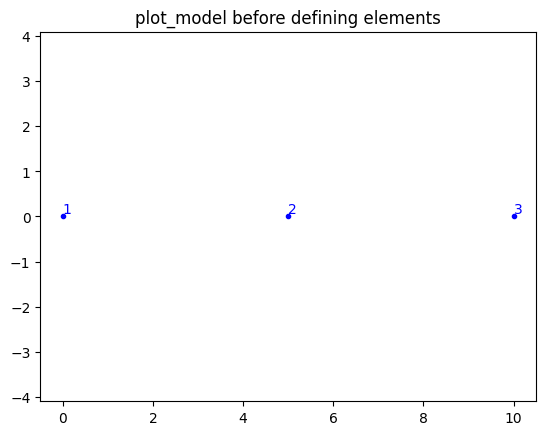

In [47]:
# Definição das condições de contorno
fix(1, 1, 1, 1)

opsv.plot_model()
plt.title('Plotagem dos nós posicionados')

In [48]:
# Definição das seçoes da viga com as respectivas propriedades de material
geomTransf('Linear', 1)
section('Elastic', 1, E, I, 1.0)
element('elasticBeamColumn', 1, 1, 2, A, E, I,1)
element('elasticBeamColumn', 2, 2, 3, A, E, I,1)

In [49]:
# Aplicação das cargas por nó
timeSeries('Linear', 1)
pattern('Plain', 1, 1)
load(2, 0.0, P, 0.0)
load(3, 0.0, P, 0.0)

In [50]:
# Análise estática
system('BandGen')
numberer('Plain')
constraints('Plain')
integrator('LoadControl', 1.0)
algorithm('Linear')
analysis('Static')
analyze(1)

0

45714285.714285605

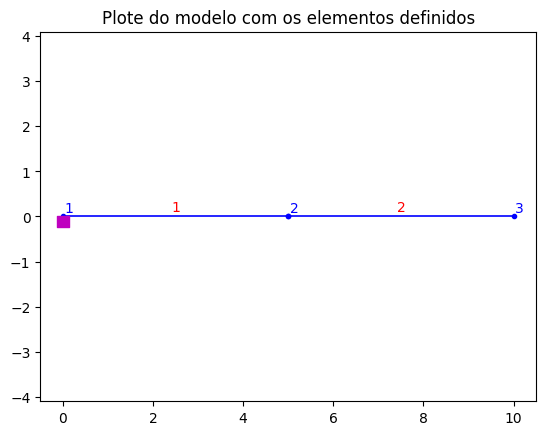

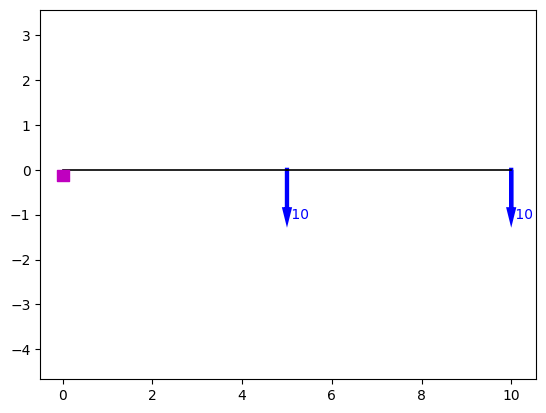

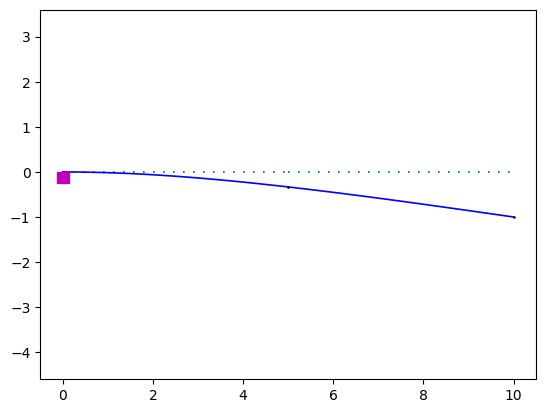

In [53]:
###################Plotagens do modelo##################
opsv.plot_model()
plt.title('Plote do modelo com os elementos definidos')

#Ploter do modelo com as cargas aplicadas
opsv.plot_load()
plt.title('Plote do modelo com as cargas aplicadas')
#Ploter do modelo deformado
opsv.plot_defo()

In [55]:
#Imprime os resultados da análise (padrão)
printModel()

Current Domain Information
	Current Time: 1
	Committed Time: 1
NODE DATA: NumNodes: 3

numComponents: 3

 Node: 1
	Coordinates  : 0 0 
	Disps: 0 0 0 
	 unbalanced Load: 0 0 0 
	ID : -1 -1 -1 


 Node: 2
	Coordinates  : 5 0 
	Disps: 0 -7.29167e-09 -2.5e-09 
	 unbalanced Load: 0 -10 0 
	ID : 0 1 2 


 Node: 3
	Coordinates  : 10 0 
	Disps: 0 -2.1875e-08 -3.125e-09 
	 unbalanced Load: 0 -10 0 
	ID : 3 4 5 

ELEMENT DATA: NumEle: 2

numComponents: 2

ElasticBeam2d: 1
	Connected Nodes: 1 2 
	CoordTransf: 1
	mass density:  0, cMass: 0
	release code:  0
	End 1 Forces (P V M): 0 20 150
	End 2 Forces (P V M): 0 -20 -50

ElasticBeam2d: 2
	Connected Nodes: 2 3 
	CoordTransf: 1
	mass density:  0, cMass: 0
	release code:  0
	End 1 Forces (P V M): 0 10 50
	End 2 Forces (P V M): 0 -10 -1.98952e-13

SP_Constraints: numConstraints: 3

numComponents: 3
SP_Constraint: 0	 Node: 1 DOF: 1 ref value: 0 current value: 0 initial value: 0
SP_Constraint: 1	 Node: 1 DOF: 2 ref value: 0 current value: 0 initial val